
# Project: Investigate a Dataset (No-show appointments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


### Details about the dataset
<p><b>No-show appointments</b></p>
This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics of the patient are included in the dataset. 
    
### Question I want to answer with the data analysis
<ol>
<li> Do patients show up or no? </li>
<li> In which month are we likely to have most appointment requests and in which month are we likely going to have several patients to avail enough doctors?  </li>
<li>Which neighbourhood has more patients?</li>
<li> Does age have anything to do with having Hipertension or Diabetes?</li>
</ol>


In [113]:
#importing packages and loading data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

a id='wrangling'></a>
## Data Wrangling

In this section I am going to check for cleanliness, trim and clean the dataset for analysis. 

### General Properties and cleaning

In [88]:
# showing first three lines of the dataset
df.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [151]:
#The hyphen in 'No-show' might get confusing, therefore I am replacing the hyphen with an underscore
df.rename(columns = {'No-show':'No_show'}, inplace = True)
#viewing the change
df.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [21]:
#Checking the number of rows and columns of the dataframe
df.shape

(110527, 14)

It has 110527 rows and 14 columns

In [22]:
#   types and look for instances of missing or possibly errant data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


There is no null value as seen in the info above so I will proceed and look for duplicates

In [23]:
#checking if the dataset has duplicates
sum(df.duplicated())

0

No duplicates found

In [24]:
#However the ScheduledDay and AppointmentData columns have the wrong datatypes, so I'll change that 
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [25]:
# Checking if the new datatypes are recorded
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

<a id='eda'></a>
## Exploratory Data Analysis

Now that I've trimmed and cleaned my data, I'm moving on to exploration. I am going to compute statistics and create visualizations with the goal of addressing the research questions that I posed in the Introduction section. 

### Research Question 1 (Do patients show up or no?)

In [149]:
#In this case I will use a histogram to view the distribution. 
#Because I'm likely going to use histogram again I will create a function

def plotHistogram(column):
    column.hist();

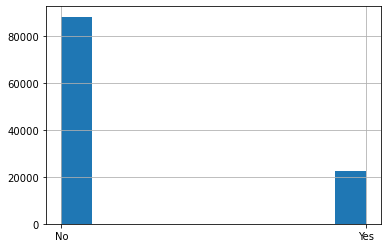

In [154]:
#Ploting a histogram to see the rate at which patients show up for their appointment.
plotHistogram(df.No_show);

From the histogram above we see that only around 20000 patients show up for their appointments and more than 80000 don't show up. Therefore most patients don't come to their appointments.

### Research Question 2 (In which month are we likely to have most appointment requests and in which month are we likely going to have several patients to avail enough doctors?)

To answer these two questions I will use histograms, as well

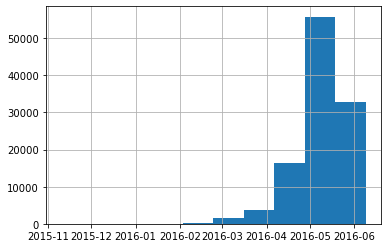

In [33]:
# For Scheduled days
plotHistogram(df.ScheduledDay);

The above histogram shows that <b>May 2016 was the time when most appointments got scheduled</b>. Which suggest that they should avail more customer care service during that period to help patients to schedule appointments.

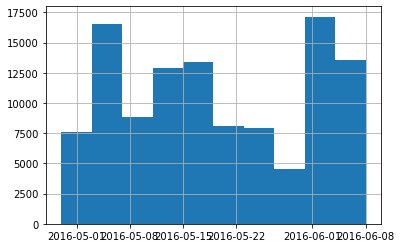

In [34]:
# For Appointment days
plotHistogram(df.AppointmentDay);

As seen in this histogram, <b>June 2016</b> is likely going to have more patients, therefore several doctors should be present, ready to help patients

### Research Question 3  (Which neighbourhood has more patients?)

To answer this, I will use a bar chart to see which neighbourhood has most patients

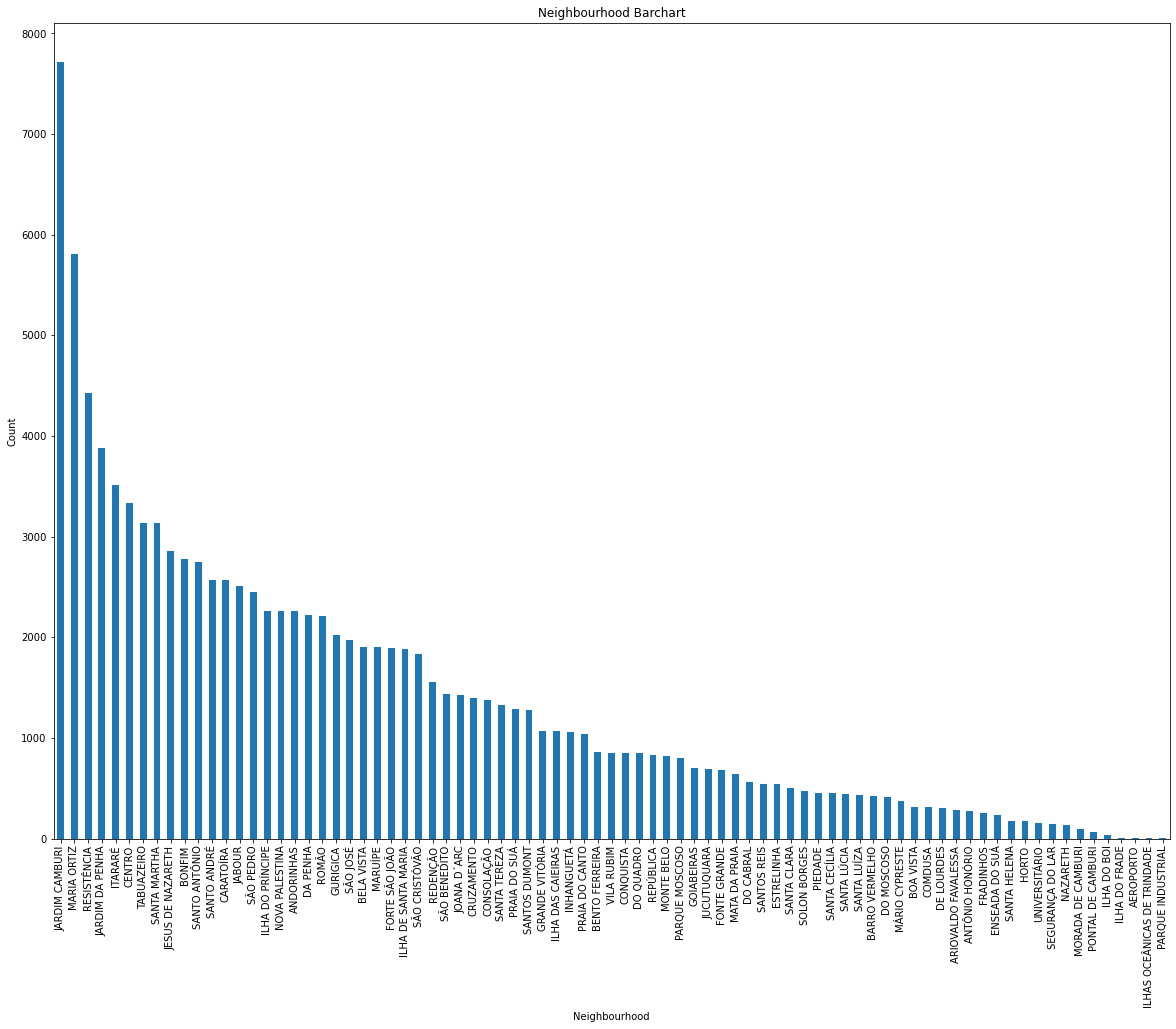

In [142]:
#Barchart to show patients per Neighbourhood
df.Neighbourhood.value_counts().plot(kind= 'bar', figsize = (20,15)).set(title = 'Neighbourhood Barchart', ylabel = 'Count', xlabel = 'Neighbourhood');

The above barchart shows that the (JARDIM CAMBURI) neighbourhood has most patients compared to other neighbourhoods.

### Research Question 3  (Does age have anything to do with having Hipertension or Diabetes?)

To answer this question I will get the median age and use it to see if younger people are more likely to have Hipertension and Diabetes 

First, I will start with Diabetes:

In [121]:
#Getting the median of age
df.Age.median()

37.0

In [127]:
# selecting samples with age less than the median
young = df.query('Age < 37')

# selecting samples with age greater than or equal to the median
old = df.query('Age >= 37')

#Source: Udacity class course

In [129]:
# get mean rating of Hipertension for the low Age and high Age groups
young.Hipertension.mean(), old.Hipertension.mean()

(0.018998241242855048, 0.3711635057111703)

From the mean of both young people and and the elder people, I see that the one for older people is high which means that the older people are more likely to have Hipertension

Let me also do the same analysis for Diabetes

In [155]:
# get mean rating of Diabetes for the low Age and high Age groups
young.Diabetes.mean(), old.Diabetes.mean()

(0.005935805364209292, 0.13619219562769247)

From the above pattern analysis, leads me to conclude that older people are even more likely to have diabetes, since their mean is higher than the one of younger people.

<a id='conclusions'></a>
## Conclusions


### Results
From the above analysis, I saw that most patients are more likely to miss their appointments, I saw that most patients booked appointment in May 2016 had appointments in June 2016. The neighbourhood with more patients is JARDIM CAMBURI. I also got to learn from it that older people are more likely to have Hipertension and Diabetes.

### Limitations
My conclusion is stopped at a point where I need to conduct more study of this dataset, to draw more conclusions and understand more the patients, a task which I feel needs the use of more methods, classes and plots. which I am limitted to do because most data was in zeros and ones. I will keep exercising to grow even the intuition to deal with datasets with binary variables.